<a href="https://colab.research.google.com/github/Moneypuckyow/Tugas_Image_Classifier/blob/master/ALEX_LIANARDO_1101184199_TT_42_02_TUGAS_BESAR_SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Alex Lianardo

Nim : 1101184199

Kelas : TT-42-02

Skenario Perancangan FTTB

Jadi, skenario perancangan FTTB yang akan saya buat yaitu dari Sentral kemudian ke ODC lalu ke ONU lanjut ke ODP dan yang terakhir ke Roset. Terdapat salah satu Hotel di Palangkaraya bernama Aquarius, hotel ini memiliki 27 lantai, setiap lantai terdapat 10 kamar. Jadi, rencangan ini saya akan menggunakan Jenis Fiber G652D dengan panjang gelombang 1490 nm dengan redaman 0.28 dB/Km, dan akan menggunakan 4 konektor dan 2 spliter, dengan menggunakan spliter 1:32 dengan redaman 18.5 dB, lanjut untuk ONU ke ODP dengan menggunakan spliter 1:16 dengan redaman 15 dB untuk ODP ke Roset.Selain itu, dengan jumlah konektor terdapat 4 dan spliter 2, maka splicer ada 6 buah yang memiliki redaman 0.2 dB.









In [28]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.8 #Responsivitas
SM = 6   #Safety Margin
M = -0.23 #Tambahan daya sinyal OPD
q = 1.6*10**-19 #Muatan
id = 90*10**-9 #Dark Current
B = 8*10**9 #Bandwidth
F = 1 #Factor Gain
K = 1.38*10**-23 #Konstanta Ballsman
Teff = 300 #Suhu 
RL = 50 #Resistance Equivalent

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> 5*27 = 135 m 
#jarak total = 20000 + 135 = 20135 m

d = np.arange(0.135,20.136,1) #Jarak (km)
L_fiber = 0.28 #berdasarkan jenis G625D (dB)  
N_splicer = 6 #Jumlah Splicer
L_splicer = 0.2 #Loss dari splicer (db)
N_connector = 4 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 15 + 18.5 
Pt = 2 #Daya tx (dBm)

In [30]:
#RUMUS PR
def P_receive():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  print("Redaman Total =", alfa_total)
  Pr = (Pt - alfa_total)
  return Pr

Pr = P_receive()

print("Daya Terima = ", Pr, "dBm")

Redaman Total = [41.9378 42.2178 42.4978 42.7778 43.0578 43.3378 43.6178 43.8978 44.1778
 44.4578 44.7378 45.0178 45.2978 45.5778 45.8578 46.1378 46.4178 46.6978
 46.9778 47.2578 47.5378]
Daya Terima =  [-39.9378 -40.2178 -40.4978 -40.7778 -41.0578 -41.3378 -41.6178 -41.8978
 -42.1778 -42.4578 -42.7378 -43.0178 -43.2978 -43.5778 -43.8578 -44.1378
 -44.4178 -44.6978 -44.9778 -45.2578 -45.5378] dBm


In [31]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [8.11540105e-05 7.60869170e-05 7.13362026e-05 6.68821133e-05
 6.27061283e-05 5.87908835e-05 5.51200988e-05 5.16785104e-05
 4.84518079e-05 4.54265743e-05 4.25902302e-05 3.99309817e-05
 3.74377713e-05 3.51002320e-05 3.29086440e-05 3.08538943e-05
 2.89274390e-05 2.71212678e-05 2.54278703e-05 2.38402051e-05
 2.23516705e-05]


In [32]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [3.48397994e-10 3.06249682e-10 2.69200366e-10 2.36633183e-10
 2.08005896e-10 1.82841866e-10 1.60722118e-10 1.41278360e-10
 1.24186860e-10 1.09163046e-10 9.59567756e-11 8.43481664e-11
 7.41439375e-11 6.51741905e-11 5.72895810e-11 5.03588317e-11
 4.42665470e-11 3.89112915e-11 3.42039014e-11 3.00659995e-11
 2.64286906e-11]


In [33]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[21.17095669 20.61207694 20.05312751 19.49411271 18.9350366  18.37590299
 17.81671543 17.25747729 16.6981917  16.1388616  15.57948978 15.02007882
 14.46063115 13.90114905 13.34163468 12.78209003 12.222517   11.66291735
 11.10329273 10.5436447   9.98397472]


In [34]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[5.72160456 5.36505096 5.03067637 4.71710605 4.42304985 4.14729715
 3.88871196 3.64622839 3.4188464  3.20562772 3.00569212 2.81821385
 2.64241826 2.47757869 2.32301352 2.1780834  2.04218863 1.91476672
 1.79529012 1.68326402 1.57822435]


In [35]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.11663422e-06 7.55696053e-06 4.02919278e-05 1.74181846e-04
 6.26152254e-04 1.91384404e-03 5.07198085e-03 1.18567388e-02
 2.48222804e-02 4.71614682e-02 8.22784400e-02 1.33170792e-01
 2.01784680e-01 2.88523771e-01 3.92039723e-01 5.09339848e-01
 6.36159106e-01 7.67488739e-01 8.98141062e-01 1.02325061e+00
 1.13864945e+00]


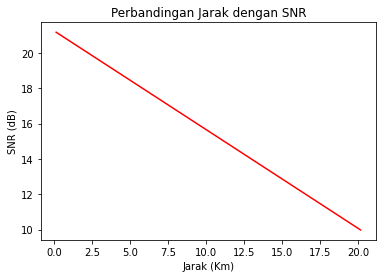

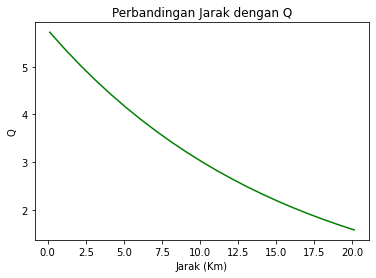

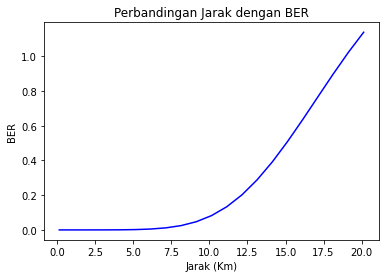

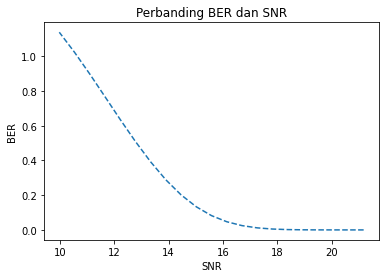

In [36]:
#GRAFIK
def grafik_pertama():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_kedua():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_ketiga():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_perbandingan_SNR_BER():
  plt.figure()
  plt.plot(SNR,BER,'--')
  plt.title('Perbanding BER dan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()
  

grafik_pertama()
grafik_kedua()
grafik_ketiga()
grafik_perbandingan_SNR_BER()